<a href="https://colab.research.google.com/github/MarcosLaydner/ds_repo/blob/master/Lab_4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")

df[['job']] = df[['job']].apply(LabelEncoder().fit_transform)
df[['marital']] = df[['marital']].apply(LabelEncoder().fit_transform)
df[['education']] = df[['education']].apply(LabelEncoder().fit_transform)
df[['default']] = df[['default']].apply(LabelEncoder().fit_transform)
df[['housing']] = df[['housing']].apply(LabelEncoder().fit_transform)
df[['loan']] = df[['loan']].apply(LabelEncoder().fit_transform)
df[['contact']] = df[['contact']].apply(LabelEncoder().fit_transform)
df[['month']] = df[['month']].apply(LabelEncoder().fit_transform)
df[['day_of_week']] = df[['day_of_week']].apply(LabelEncoder().fit_transform)
df[['poutcome']] = df[['poutcome']].apply(LabelEncoder().fit_transform)

In [0]:
split = train_test_split(df, test_size=0.20)
data = split[0]
test_data = split[1]


In [55]:
y = data.y
X = data.loc[:, data.columns != 'y']

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=10).mean()

0.9090743550834599

In [56]:
y_test = test_data.y
X_test = test_data.loc[:, test_data.columns != 'y']

clf.score(X_test, y_test)

0.911143481427531

In [57]:
df_dummies = pd.get_dummies(df)
df_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_no,y_yes
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1


In [0]:
del df_dummies['y_no']
del df_dummies['duration']

(array([36548.,  4640.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

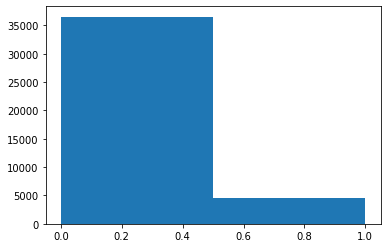

In [59]:
plt.hist(df_dummies.y_yes, bins=2)

In [60]:
y = df_dummies.y_yes
X = df_dummies.loc[:, df_dummies.columns != 'y_yes']

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=10).mean()

0.4668261403904082

[ 0 17 10  1  3  9 11 18  2  5 14 13 16  6 15  7 12  8  4]
Feature ranking:
1. age (0.176912)
2. euribor3m (0.116673)
3. campaign (0.106650)
4. job (0.089439)
5. education (0.081210)
6. day_of_week (0.062062)
7. pdays (0.055119)
8. nr.employed (0.049557)
9. marital (0.045549)
10. housing (0.034414)
11. emp.var.rate (0.028924)
12. poutcome (0.027097)
13. cons.conf.idx (0.026174)
14. loan (0.024411)
15. cons.price.idx (0.018292)
16. contact (0.015120)
17. previous (0.015078)
18. month (0.015022)
19. default (0.012297)


(0, 0.19353390384844843)

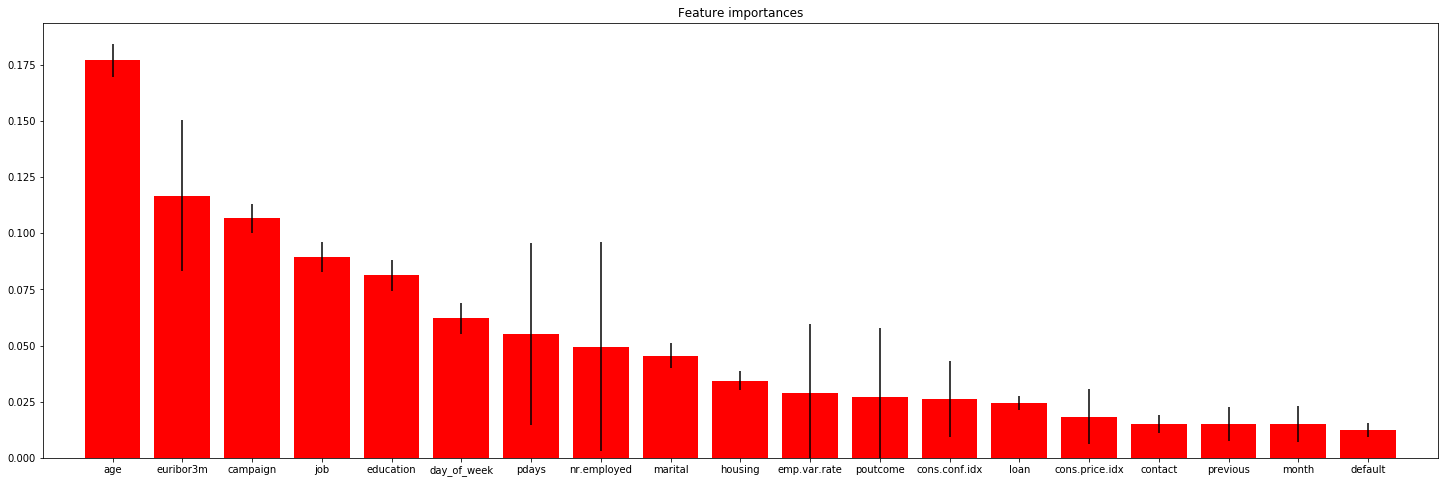

In [66]:
features = list(X.columns) 
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(25,8)
axes = plt.gca()
axes.set_ylim([0,None])

Text(0.5, 13.421126458070283, 'Predicted label')

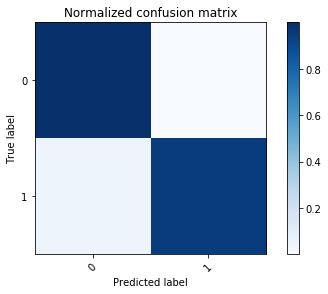

In [72]:
y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
classes = range(len(set(y)))

plt.figure()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    t = "(%.2f)"%(cm[i, j])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')